In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')

In [39]:
data=pd.read_csv(r'D:\BBC News.csv')

In [40]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [41]:
data.columns

Index(['ArticleId', 'Text', 'Category'], dtype='object')

In [42]:
data.shape

(1490, 3)

In [43]:
data.duplicated().sum()

0

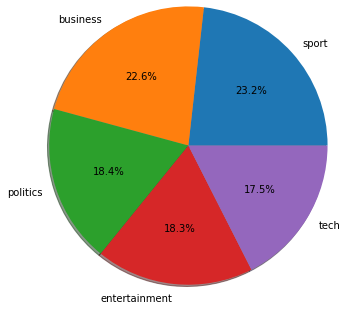

In [44]:
plt.pie(data.Category.value_counts().values[0:8],labels=data.Category.value_counts().index[0:8],autopct='%1.1f%%', shadow=True, radius=1.6)
plt.show()

In [45]:
data.drop(['ArticleId'],axis=1,inplace=True)

In [46]:
data.isna().sum()

Text        0
Category    0
dtype: int64

In [47]:
data.Text.apply(len)

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: Text, Length: 1490, dtype: int64

In [48]:
data['text_length']=data['Text'].apply(lambda x: len(x)-x.count(" "))

In [49]:
data

,Text,Category,text_length
0,worldcom ex-boss launches defence lawyers defe...,business,1543
1,german business confidence slides german busin...,business,1669
2,bbc poll indicates economic gloom citizens in ...,business,2554
3,lifestyle governs mobile choice faster bett...,tech,2927
4,enron bosses in $168m payout eighteen former e...,business,1810
...,...,...,...
1485,double eviction from big brother model caprice...,entertainment,1030
1486,dj double act revamp chart show dj duo jk and ...,entertainment,2493
1487,weak dollar hits reuters revenues at media gro...,business,1119
1488,apple ipod family expands market apple has exp...,tech,2648


#### to convert into lower casing

In [50]:
data['Text']=data['Text'].str.lower()

#### to remove html tags

In [51]:
import re
def remove_html(text):
    pattern=re.compile('<.#?>')
    return pattern.sub(r'',text)
data['Text']=data['Text'].apply(remove_html)

#### punctuation removal

In [52]:
import string 
exclude=string.punctuation
def remove_punct(text):
    for i in exclude:
        text=text.replace(i,'')
    return text
data['Text']=data['Text'].apply(remove_punct)

#### to remove numbers

In [53]:
def remove_num(text):
    pattern=r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern,'',text)
data['Text']=data['Text'].apply(remove_num)

#### word tokenization

In [54]:
data['text_token']=data['Text'].apply(lambda x:nltk.word_tokenize(x))

In [55]:
import nltk

#### stop word removal

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')
def stopword(text):
    y=[]
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
    return y
data['text_token']=data['text_token'].apply(stopword)

#### stemming

In [62]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemmer(text):
    text=[ps.stem(word) for word in text]
    return text
data['text_token']=data['text_token'].apply(lambda x: stemmer(x))

In [58]:
data

,Text,Category,text_length,text_token
0,worldcom exboss launches defence lawyers defen...,business,1543,"[worldcom, exboss, launch, defenc, lawyer, def..."
1,german business confidence slides german busin...,business,1669,"[german, busi, confid, slide, german, busi, co..."
2,bbc poll indicates economic gloom citizens in ...,business,2554,"[bbc, poll, indic, econom, gloom, citizen, maj..."
3,lifestyle governs mobile choice faster bett...,tech,2927,"[lifestyl, govern, mobil, choic, faster, bette..."
4,enron bosses in m payout eighteen former enron...,business,1810,"[enron, boss, payout, eighteen, former, enron,..."
...,...,...,...,...
1485,double eviction from big brother model caprice...,entertainment,1030,"[doubl, evict, big, brother, model, capric, ho..."
1486,dj double act revamp chart show dj duo jk and ...,entertainment,2493,"[dj, doubl, act, revamp, chart, show, dj, duo,..."
1487,weak dollar hits reuters revenues at media gro...,business,1119,"[weak, dollar, hit, reuter, revenu, media, gro..."
1488,apple ipod family expands market apple has exp...,tech,2648,"[appl, ipod, famili, expand, market, appl, exp..."


In [59]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Category']=lb.fit_transform(data['Category'])


In [60]:
data

,Text,Category,text_length,text_token
0,worldcom exboss launches defence lawyers defen...,0,1543,"[worldcom, exboss, launch, defenc, lawyer, def..."
1,german business confidence slides german busin...,0,1669,"[german, busi, confid, slide, german, busi, co..."
2,bbc poll indicates economic gloom citizens in ...,0,2554,"[bbc, poll, indic, econom, gloom, citizen, maj..."
3,lifestyle governs mobile choice faster bett...,4,2927,"[lifestyl, govern, mobil, choic, faster, bette..."
4,enron bosses in m payout eighteen former enron...,0,1810,"[enron, boss, payout, eighteen, former, enron,..."
...,...,...,...,...
1485,double eviction from big brother model caprice...,1,1030,"[doubl, evict, big, brother, model, capric, ho..."
1486,dj double act revamp chart show dj duo jk and ...,1,2493,"[dj, doubl, act, revamp, chart, show, dj, duo,..."
1487,weak dollar hits reuters revenues at media gro...,0,1119,"[weak, dollar, hit, reuter, revenu, media, gro..."
1488,apple ipod family expands market apple has exp...,4,2648,"[appl, ipod, famili, expand, market, appl, exp..."


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
Countvec=CountVectorizer(min_df=2,max_df=5)
x_counts=Countvec.fit_transform(data['Text'])
print(x_counts.shape)
print(Countvec.get_feature_names()[15:30])

(1490, 8015)
['abide', 'abided', 'abilities', 'ablebodied', 'abolishing', 'abortion', 'absent', 'absentee', 'absorb', 'absorbed', 'absorbing', 'absurd', 'abuses', 'abusing', 'abusive']


C:\Users\shaha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,4),min_df=2,max_df=5)
x_tf=tfidf.fit_transform(data['Text'])
print(x_tf.shape)
print(tfidf.idf_)
print(tfidf.get_feature_names()[15:30])

(1490, 156998)
[6.6977644  7.20859003 7.20859003 ... 6.51544285 7.20859003 7.20859003]
['abbas', 'abbas said', 'abbas will', 'abbasi', 'abbasi and', 'abbasi and mr', 'abbasi and mr mubanga', 'abbasi from', 'abbott', 'abbott and', 'abc network', 'abc television', 'abc television program', 'abc television program earlier', 'abdellatif']


In [88]:
X=x_tf
y=data['Category']

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("accuracy score", accuracy_score(y_pred,y_test))
print('precision {} -------- recall{} '.format(precision_score(y_pred,y_test,average='micro'),recall_score(y_test,y_pred,average='micro')))

accuracy score 0.5604026845637584
precision 0.5604026845637584 -------- recall0.5604026845637584 
